
# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset contains information about 100,000 medical appointments in Brazil, focused on whether or not patients show up for their appointments. The dataset includes the following columns:

'PatientId': Identification number for the patient.
'AppointmentID': Identification number for the appointment.
'Gender': Gender of the patient (M or F).
'ScheduledDay': The date when the appointment was scheduled.
'AppointmentDay': The date of the actual appointment.
'Age': Age of the patient.
'Neighborhood': Location of the hospital.
'Scholarship': Indicates whether the patient is enrolled in the Brazilian welfare program Bolsa Família.
'Hipertension': 1 if the patient has hypertension, 0 otherwise.
'Diabetes': 1 if the patient has diabetes, 0 otherwise.
'Alcoholism': 1 if the patient has alcoholism, 0 otherwise.
'Handcap': Number of disabilities the patient has (0, 1, 2, 3, 4).
'SMS_received': 1 if the patient received an SMS reminder, 0 otherwise.
'No-show': Indicates whether the patient did not show up ('Yes') or did show up ('No').

### Question(s) for Analysis
#### 1_What factors influence a patient's likelihood of not showing up for their appointment?
#### 2_Does receiving an SMS reminder affect the no-show rate?
#### 3_Are there certain age groups or genders that are more likely to miss appointments?


In [1]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def create_count_plot(data, feature, hue=None, title=None):
    sns.countplot(data=data, x=feature, hue=hue)
    if title:
        plt.title(title)
    plt.show()

In [3]:

def create_hist_plot(data, feature, hue=None, title=None):
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, x=feature, hue=hue, multiple='stack')
    if title:
        plt.title(title)
    plt.show()

In [4]:
def create_bar_plot(data, x_feature, y_feature, hue=None, title=None):
    plt.figure(figsize=(12,6))
    sns.barplot(data=data, x=x_feature, y=y_feature, hue=hue)
    if title:
        plt.title(title)
    plt.show()

In [5]:
#Load and Inspect Data
file_path = 'C:\\Users\\user\\Desktop\\project\\KaggleV2-May-2016.csv'
data = pd.read_csv(file_path)
## Display the first few rows of the dataset to understand its structure
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#Check the shape of the dataset
data.shape

(110527, 14)

In [7]:
# Check for  values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#Statistical summary of the dataset
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#Check for missing values
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<a id='wrangling'></a>
## Data Wrangling

Data Cleaning

In [10]:
# Convert date columns to datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [11]:
# Create LeadTime column
data['LeadTime'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

In [12]:
# Encode No-show column
data['No-show'] = data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
# Check for duplicates and remove if any
data = data.drop_duplicates()

In [14]:
# Verify data types and the first few rows of the dataframe
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,LeadTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:What factors influence a patient's likelihood of not showing up for their appointment?

<Axes: ylabel='count'>

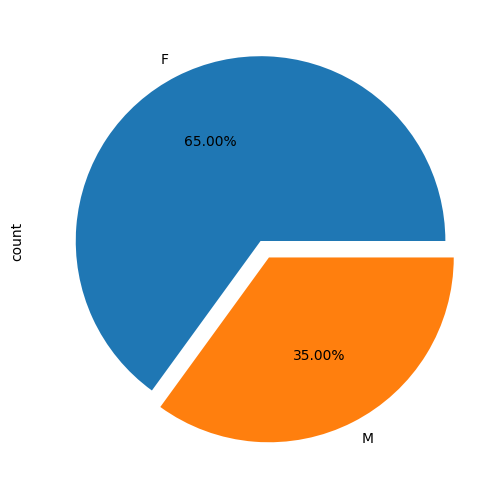

In [15]:
#Gender Distribution
data['Gender'].value_counts().plot(kind='pie', figsize=(14,6),explode=[0,0.1], autopct='%1.2f%%')

The pie chart shows that the majority of patients are female (approximately 65%), while males account for about 35%. This information is useful for understanding the demographic makeup of the patients.

<Axes: ylabel='count'>

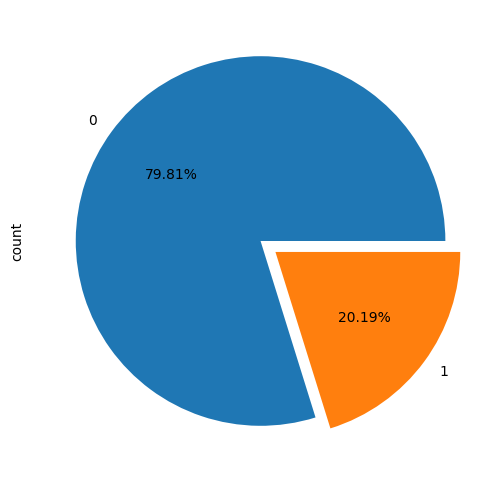

In [16]:
data['No-show'].value_counts().plot(kind='pie', figsize=(14,6),explode=[0,0.1], autopct='%1.2f%%')

The bar plot reveals that both males and females have similar no-show rates, suggesting that gender alone may not be a significant factor in predicting no-shows.

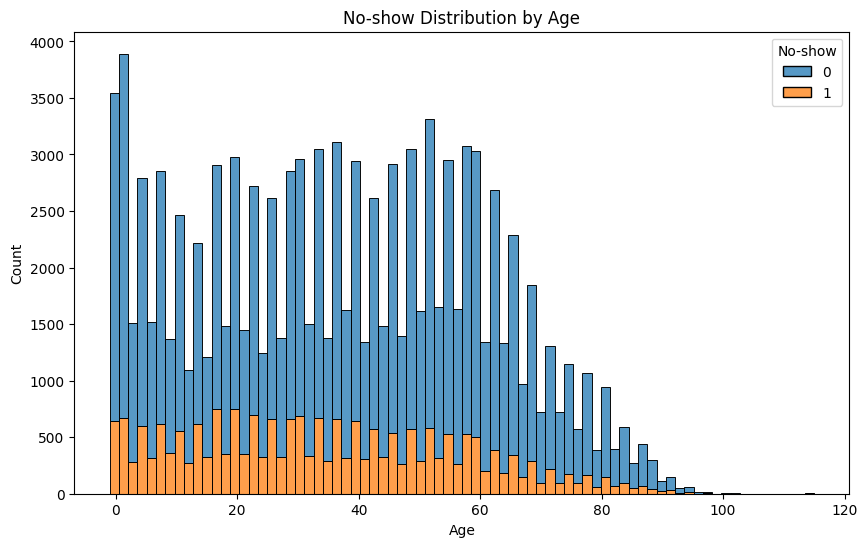

In [17]:
#Age Distribution
create_hist_plot(data, 'Age', hue='No-show', title='No-show Distribution by Age')

The histogram indicates that younger patients (particularly those aged 0-18) are more likely to miss appointments. This insight could be valuable for targeting interventions towards younger age groups.

### Research Question 2: Does receiving an SMS reminder affect the no-show rate?

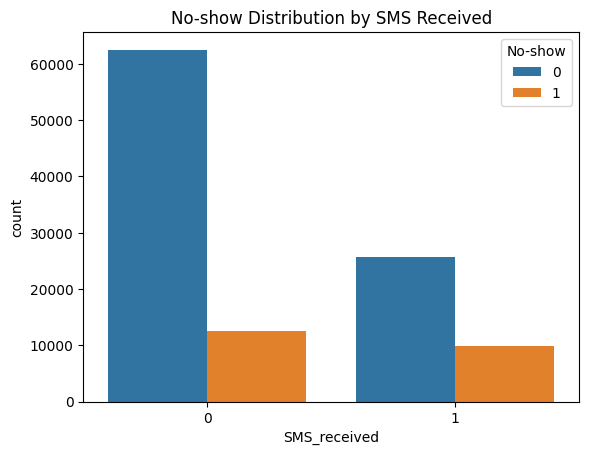

In [18]:
create_count_plot(data, 'SMS_received', hue='No-show', title='No-show Distribution by SMS Received')

The count plot shows that patients who received an SMS reminder have a lower no-show rate compared to those who did not receive a reminder. This suggests that SMS reminders can be an effective tool in reducing no-shows.

### Research Question 3: Are there certain age groups or genders that are more likely to miss appointments?

In [19]:
# Create age groups
bins = [0, 18, 35, 55, 75, 100]
labels = ['0-18', '19-35', '36-55', '56-75', '76-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

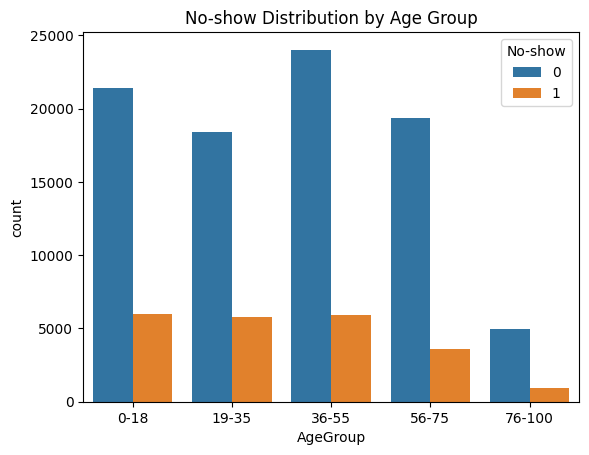

In [20]:
# Plot no-show by age group
create_count_plot(data, 'AgeGroup', hue='No-show', title='No-show Distribution by Age Group')

The  plot shows that younger age groups, particularly those aged 0-18, have higher no-show rates compared to older age groups. This further supports the earlier finding that younger patients are more likely to miss their appointments.

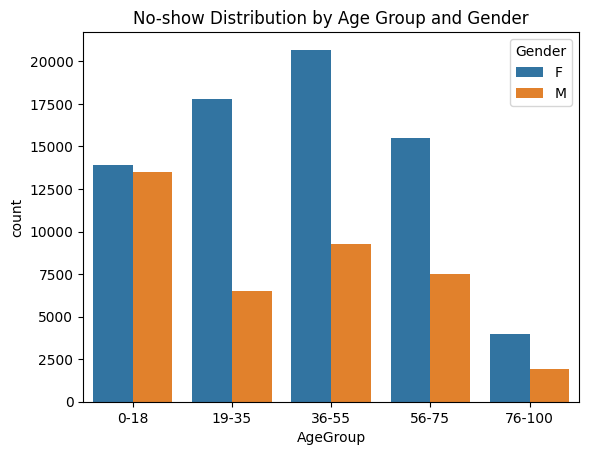

In [21]:
# Plot no-show by age group and gender
create_count_plot(data, 'AgeGroup', hue='Gender', title='No-show Distribution by Age Group and Gender')

This plot helps us understand if there are any significant differences in no-show rates between genders within different age groups. It provides a more granular view of the interaction between age and gender in relation to no-shows.

<a id='conclusions'></a>
## Conclusions
### Summary of Findings
### 1)Gender: There is a slight difference in no-show rates between genders, but it is not substantial enough to be a primary factor.
### 2)Age: Younger patients (ages 0-18) are more likely to miss appointments compared to other age groups.
### 3)SMS Reminder: Patients who received an SMS reminder have a lower no-show rate, indicating the effectiveness of reminders in reducing missed appointments.
## Limitations
### -The dataset does not include reasons for missing appointments, which could provide more context for understanding patient behavior.
### -The data is from a single country, which may limit the generalizability of the findings.
## Recommendations for Future Research
### -Including additional features such as patient satisfaction scores or transportation availability could improve the predictive power of the model.
### -Analyzing data from multiple regions or countries could provide more comprehensive insights into no-show patterns.

In [22]:
# Convert the notebook to HTML for better presentation
!python -m nbconvert --to html Database_No_show_appointments.ipynb

[NbConvertApp] Converting notebook Database_No_show_appointments.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 488121 bytes to Database_No_show_appointments.html
